<a href="https://colab.research.google.com/github/2303a51899/Aiml_2025/blob/main/lab_08_AIML_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
%matplotlib inline

In [2]:
fetch_openml(name='car')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name car exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=991
- version 3, status: active
  url: https://www.openml.org/search?type=data&id=40975

  warn(warning_msg)


{'data':      buying  maint  doors persons lug_boot safety
 0     vhigh  vhigh      2       2    small    low
 1     vhigh  vhigh      2       2    small    med
 2     vhigh  vhigh      2       2    small   high
 3     vhigh  vhigh      2       2      med    low
 4     vhigh  vhigh      2       2      med    med
 ...     ...    ...    ...     ...      ...    ...
 1723    low    low  5more    more      med    med
 1724    low    low  5more    more      med   high
 1725    low    low  5more    more      big    low
 1726    low    low  5more    more      big    med
 1727    low    low  5more    more      big   high
 
 [1728 rows x 6 columns],
 'target': 0       P
 1       P
 2       P
 3       P
 4       P
        ..
 1723    N
 1724    N
 1725    P
 1726    N
 1727    N
 Name: binaryClass, Length: 1728, dtype: category
 Categories (2, object): ['N', 'P'],
 'frame':      buying  maint  doors persons lug_boot safety binaryClass
 0     vhigh  vhigh      2       2    small    low           P

In [3]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car',version=2,parser='auto')


In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
car_data.details['version']

'2'

In [7]:
car_data.feature_names,car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [8]:
car_data.feature_names,car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [9]:
car_data.feature_names


['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [10]:
car_data=car_data.frame
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [11]:
type(car_data)


pandas.core.frame.DataFrame

<Axes: xlabel='binaryClass', ylabel='count'>

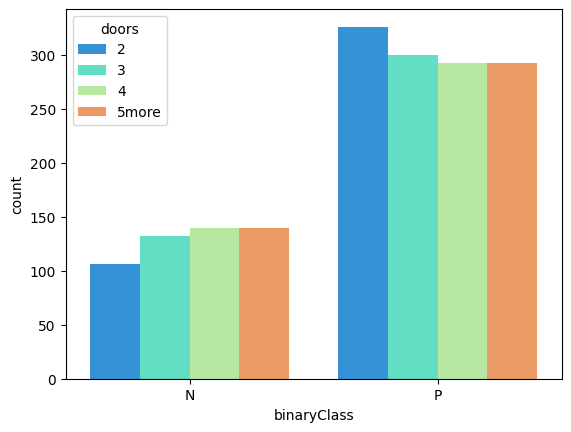

In [12]:
sns.countplot(x=car_data.binaryClass,hue='doors',data=car_data,palette='rainbow')

In [13]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.2,random_state=20)
print('training data is: {}\n testing data is: {}'.format(len(train_data),len(test_data)))

training data is: 1382
 testing data is: 346


In [14]:
train_data.describe

<bound method NDFrame.describe of      buying  maint  doors persons lug_boot safety binaryClass
438    high  vhigh      2       2      big    low           P
36    vhigh  vhigh      3       4    small    low           P
1170    med    med  5more       4    small    low           P
1488    low   high  5more       2      med    low           P
1474    low   high      4       4      big    med           N
...     ...    ...    ...     ...      ...    ...         ...
924     med  vhigh      4       2      big    low           P
1247    med    low      4       2      med   high           P
271   vhigh    med      4       2    small    med           P
474    high  vhigh      3       4      big    low           P
1379    low  vhigh  5more       2    small   high           P

[1382 rows x 7 columns]>

In [15]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [16]:
train_data.columns


Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [17]:
train_data['buying'].value_counts()

,count
buying,
med,364
high,345
vhigh,343
low,330


In [18]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]


In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [20]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
car_train_prepared.shape,car_labels_prepared.shape

((1382, 6), (1382,))

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

In [23]:
from sklearn.tree import export_text
text_representation=export_text(tree_clf,feature_names=list(car_train.columns))
print(text_representation)

|--- persons <= 0.50
|   |--- class: 1
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- maint >  2.50
|   |   |   |   |--- buying <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- buying >  0.50
|   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- persons >  1.50
|  

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
preds=tree_clf.predict(car_train_prepared)
print(f"Accuracy Score: {accuracy_score(car_labels_prepared,preds)}")
print(f"Classification Report: \n{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix: \n{confusion_matrix(car_labels_prepared,preds)}")


Accuracy Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix: 
[[404   0]
 [  0 978]]
